# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
city

Number of cities in the list: 576


'karamay'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#https://api.openweatermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | loreto
Processing Record 2 of Set 1 | tari
Processing Record 3 of Set 1 | edinburgh of the seven seas
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | waslala
Processing Record 6 of Set 1 | bodden town
Processing Record 7 of Set 1 | yemetsk
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | college
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | taganrog
Processing Record 18 of Set 1 | ust-nera
Processing Record 19 of Set 1 | dudinka
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | maputo
Processing Record 22 of Set 1 | 

Processing Record 36 of Set 4 | tolanaro
Processing Record 37 of Set 4 | hilo
Processing Record 38 of Set 4 | kristiansund
Processing Record 39 of Set 4 | polva
Processing Record 40 of Set 4 | hays
Processing Record 41 of Set 4 | el porvenir
Processing Record 42 of Set 4 | udachny
Processing Record 43 of Set 4 | skelleftea
Processing Record 44 of Set 4 | selfoss
Processing Record 45 of Set 4 | six-fours-les-plages
Processing Record 46 of Set 4 | valparaiso
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | valley city
Processing Record 49 of Set 4 | strathmore
Processing Record 0 of Set 5 | kerikeri
Processing Record 1 of Set 5 | eyl
Processing Record 2 of Set 5 | sandnessjoen
Processing Record 3 of Set 5 | cable beach
City not found. Skipping...
Processing Record 4 of Set 5 | valdivia
Processing Record 5 of Set 5 | inhambane
Processing Record 6 of Set 5 | nuuk
Processing Record 7 of Set 5 | northam
Processing Record 8 of Set 5 | xai-xai
Processing Record 9 o

Processing Record 26 of Set 8 | obo
Processing Record 27 of Set 8 | conde
Processing Record 28 of Set 8 | siverek
Processing Record 29 of Set 8 | ust-tsilma
Processing Record 30 of Set 8 | azuaga
Processing Record 31 of Set 8 | mudurnu
Processing Record 32 of Set 8 | vytegra
Processing Record 33 of Set 8 | al harithah
Processing Record 34 of Set 8 | pisco
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | badarwas
Processing Record 37 of Set 8 | olinda
Processing Record 38 of Set 8 | pahlgam
Processing Record 39 of Set 8 | alofi
Processing Record 40 of Set 8 | ciudad lazaro cardenas
Processing Record 41 of Set 8 | markala
Processing Record 42 of Set 8 | palafrugell
Processing Record 43 of Set 8 | ocos
Processing Record 44 of Set 8 | rikaze
Processing Record 45 of Set 8 | acaponeta
Processing Record 46 of Set 8 | dalandzadgad
Processing Record 47 of Set 8 | kingscliff
Processing Record 48 of Set 8 | beitbridge
Processing Record 49 of Set 8 | port blair
Processing Recor

Processing Record 16 of Set 12 | codrington
Processing Record 17 of Set 12 | karatau
Processing Record 18 of Set 12 | port macquarie
Processing Record 19 of Set 12 | gaspe
Processing Record 20 of Set 12 | balykshi
Processing Record 21 of Set 12 | i-n-salah
Processing Record 22 of Set 12 | fale old settlement
Processing Record 23 of Set 12 | nabire
Processing Record 24 of Set 12 | pont rouge
Processing Record 25 of Set 12 | karamay
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [16]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,loreto,22.2667,-101.9667,70.72,47,96,6.91,MX,1689867454
1,tari,12.4086,4.4914,96.87,37,32,6.80,NG,1689867454
2,edinburgh of the seven seas,-37.0676,-12.3116,53.29,64,34,24.90,SH,1689867454
3,qaqortoq,60.7167,-46.0333,47.53,87,100,7.90,GL,1689867347
4,waslala,13.2333,-85.3833,83.61,68,37,8.01,NI,1689867454


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loreto,22.2667,-101.9667,70.72,47,96,6.91,MX,1689867454
1,tari,12.4086,4.4914,96.87,37,32,6.80,NG,1689867454
2,edinburgh of the seven seas,-37.0676,-12.3116,53.29,64,34,24.90,SH,1689867454
3,qaqortoq,60.7167,-46.0333,47.53,87,100,7.90,GL,1689867347
4,waslala,13.2333,-85.3833,83.61,68,37,8.01,NI,1689867454


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

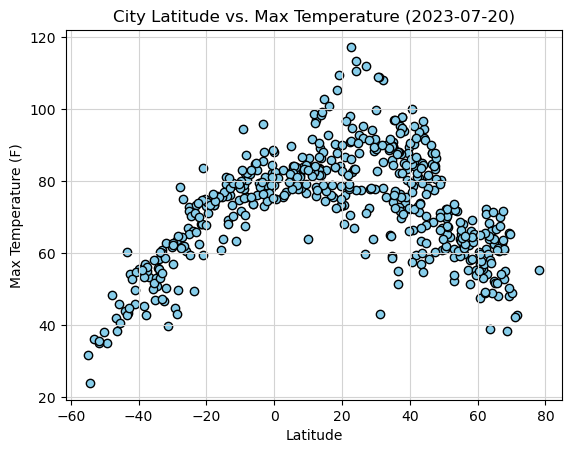

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-07-20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

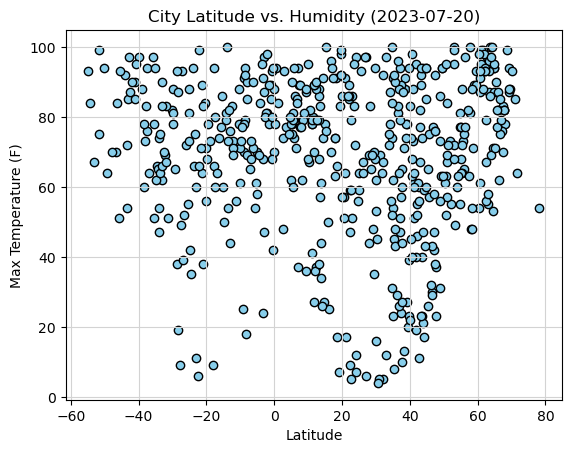

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-07-20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

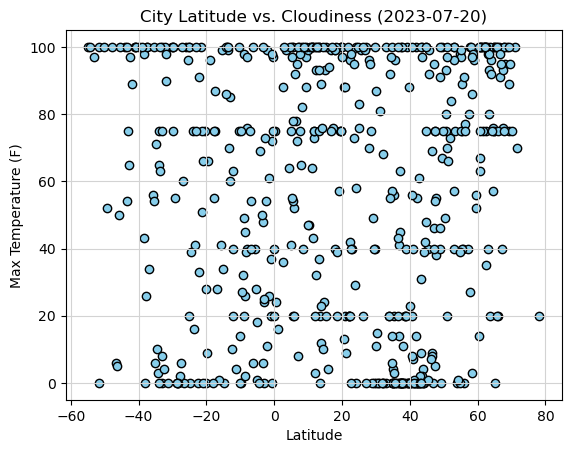

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-07-20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(visible=True,which="major",axis="both",linestyle="-",color="lightgrey")
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

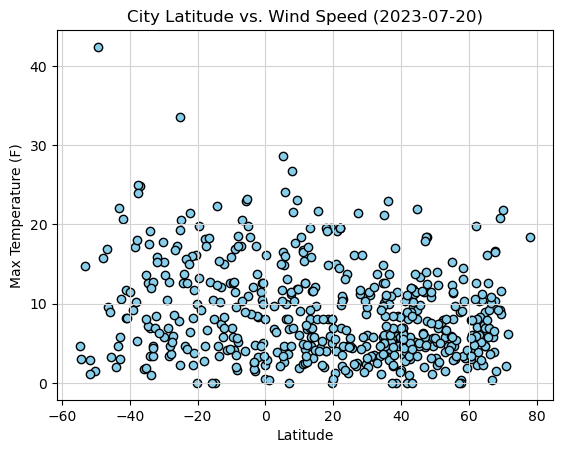

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="skyblue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-07-20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(visible=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,loreto,22.2667,-101.9667,70.72,47,96,6.91,MX,1689867454
1,tari,12.4086,4.4914,96.87,37,32,6.80,NG,1689867454
3,qaqortoq,60.7167,-46.0333,47.53,87,100,7.90,GL,1689867347
4,waslala,13.2333,-85.3833,83.61,68,37,8.01,NI,1689867454
5,bodden town,19.2833,-81.2500,84.20,83,75,19.57,KY,1689867387


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,53.29,64,34,24.90,SH,1689867454
7,blackmans bay,-43.0167,147.3167,43.52,85,75,5.75,AU,1689867455
8,bredasdorp,-34.5322,20.0403,50.99,66,10,12.57,ZA,1689867455
9,ushuaia,-54.8000,-68.3000,31.66,93,100,4.61,AR,1689867455
10,grytviken,-54.2811,-36.5092,23.99,84,100,3.04,GS,1689867455


###  Temperature vs. Latitude Linear Regression Plot

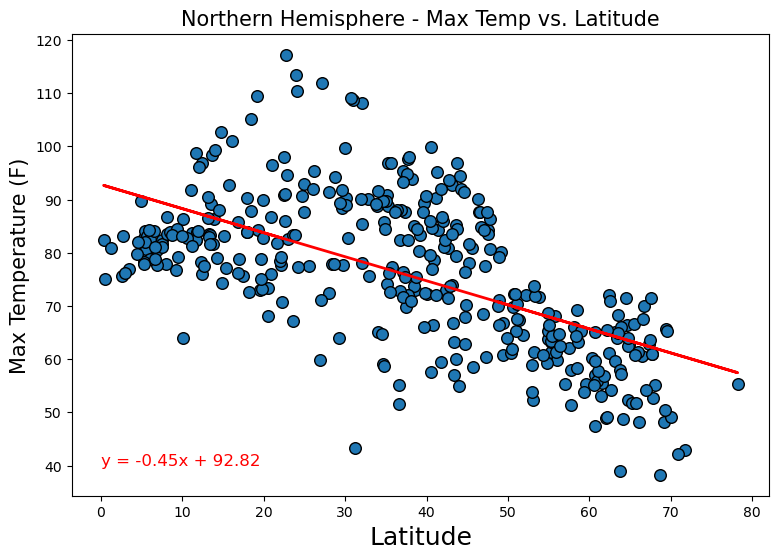

y = -0.45x + 92.82


In [41]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=15)
plt.ylabel('Max Temperature (F)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=18, color='black')
plt.annotate(line_eq,(0,40), fontsize=12, color='red')
#plt.grid(False)

# Save the figure:
plt.savefig('output_data/Fig.5 - North_hemi Latitude vs. MaxTemp_Corr.png')

# Show plot:
plt.show()
print(line_eq)

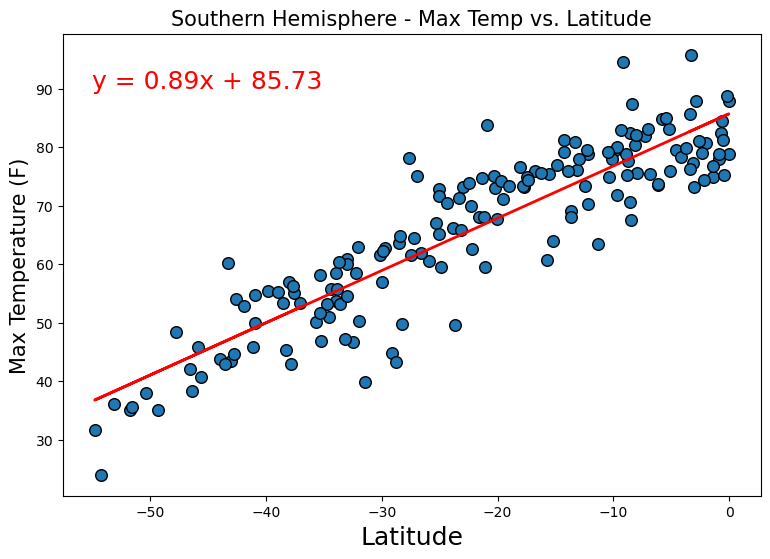

y = 0.89x + 85.73


In [48]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=15)
plt.ylabel('Max Temperature (F)', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=18, color='black')
plt.annotate(line_eq,(-55,90), fontsize=18, color='red')
#plt.grid(False)

# Save the figure:
plt.savefig('output_data/Fig.6 - South_hemi Latitude vs. MaxTemp_Corr.png')

# Show plot:
plt.show()
print(line_eq)

### Humidity vs. Latitude Linear Regression Plot

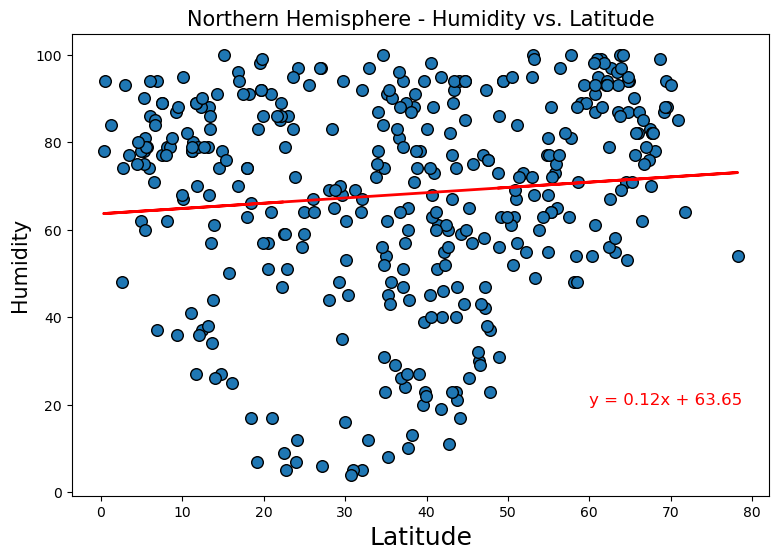

y = 0.12x + 63.65


In [62]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity vs. Latitude', fontsize=15)
plt.ylabel('Humidity', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=18, color='black')
plt.annotate(line_eq,(60,20), fontsize=12, color='red')

# Save the figure:
plt.savefig('output_data/Fig.7 - North_hemi Latitude vs. Humidity_Corr.png')

# Show plot:
plt.show()
print(line_eq)

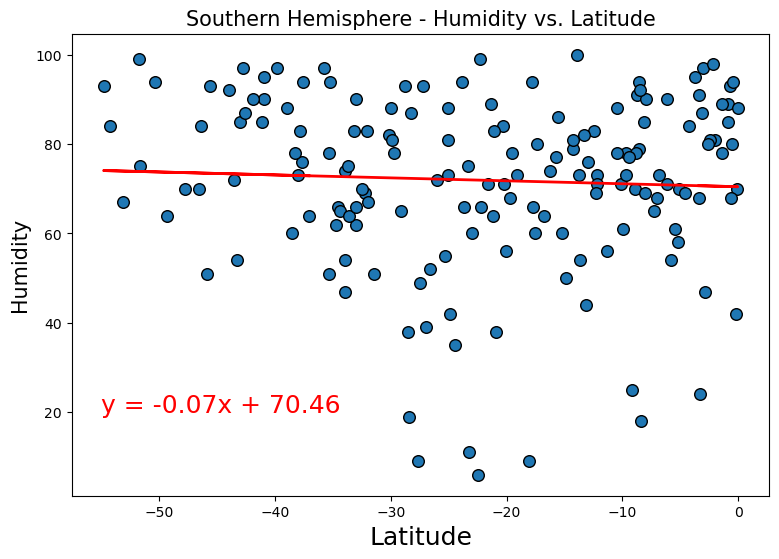

y = -0.07x + 70.46


In [55]:
#Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity vs. Latitude', fontsize=15)
plt.ylabel('Humidity', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=18, color='black')
plt.annotate(line_eq,(-55,20), fontsize=18, color='red')

# Save the figure:
plt.savefig('output_data/Fig.8 - South_hemi Latitude vs.  Humidity_Corr.png')

# Show plot:
plt.show()
print(line_eq)

1) Northern Hemisphere vs. Humidity = There is almost no correlation between humidity level and city position 
2) Southern Hemisphere vs. Humidity = There is almost no correlation between humidity levels and a city positioned on the Southern Hemisphere either

### Cloudiness vs. Latitude Linear Regression Plot

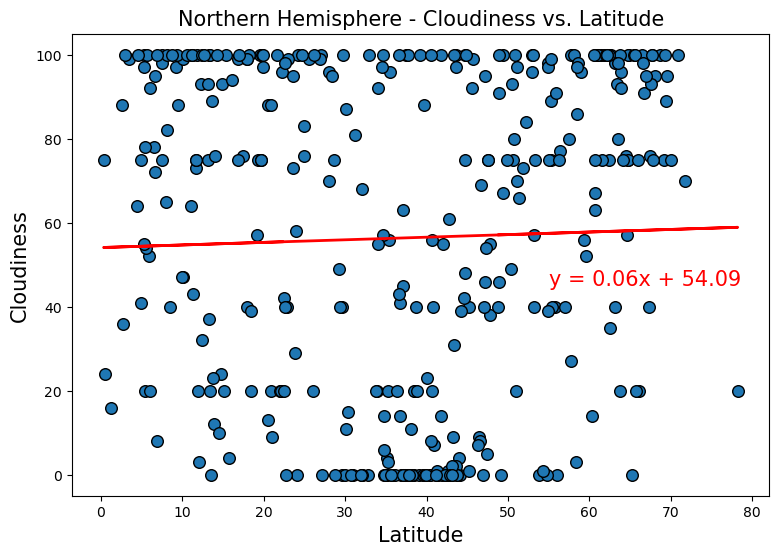

y = 0.06x + 54.09


In [59]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness vs. Latitude', fontsize=15)
plt.ylabel('Cloudiness', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(55,45), fontsize=15, color='red')

# Save the figure:
plt.savefig('output_data/Fig.9 - North_hemi Latitude vs. Cloudiness_Corr.png')

# Show plot:
plt.show()
print(line_eq)

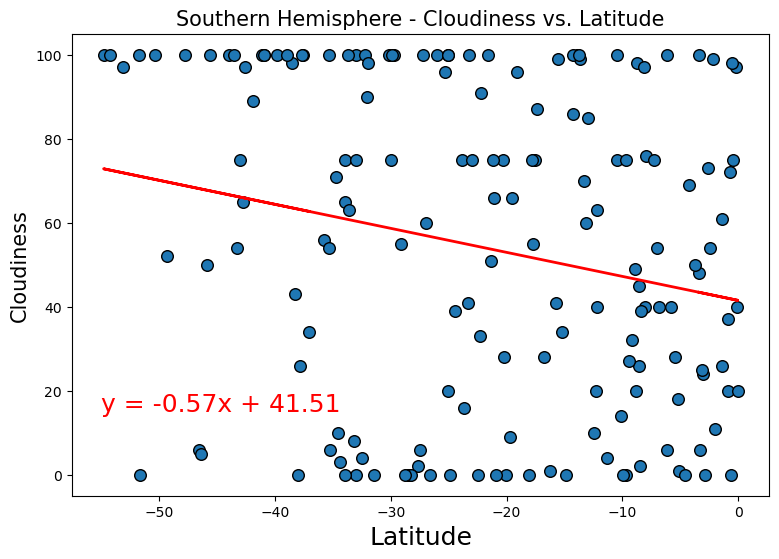

y = -0.57x + 41.51


In [61]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness vs. Latitude', fontsize=15)
plt.ylabel('Cloudiness', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=18, color='black')
plt.annotate(line_eq,(-55,15), fontsize=18, color='red')

# Save the figure:
plt.savefig('output_data/Fig.10 - South_hemi Latitude vs.  Cloudiness_Corr.png')

# Show plot:
plt.show()
print(line_eq)

Latitude vs. Cloudiness = There is no corelation between Latitude and cloudiness for both Northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

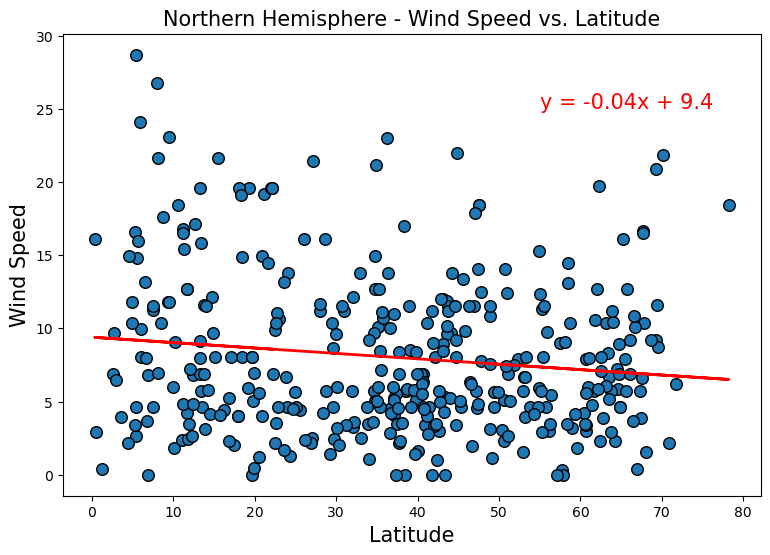

y = -0.04x + 9.4


In [65]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=15)
plt.ylabel('Wind Speed', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=15, color='black')
plt.annotate(line_eq,(55,25), fontsize=15, color='red')

# Save the figure:
plt.savefig('output_data/Fig.11 - North_hemi Latitude vs. Wind Speed_Corr.png')

# Show plot:
plt.show()
print(line_eq)

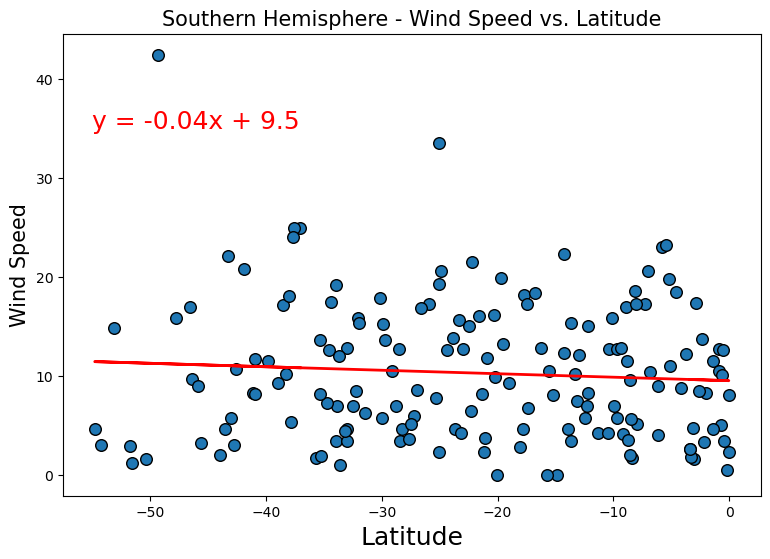

y = -0.04x + 9.5


In [66]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression for Humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'red', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=15)
plt.ylabel('Wind Speed', fontsize=15, color='black')
plt.xlabel('Latitude', fontsize=18, color='black')
plt.annotate(line_eq,(-55,35), fontsize=18, color='red')

# Save the figure:
plt.savefig('output_data/Fig.12 - South_hemi Latitude vs. Wind Speed_Corr.png')

# Show plot:
plt.show()
print(line_eq)

There is very mild correlation between the wind speed and a latitude for Northern Hemisphere, wind speed is greater for a few cities near equator. 

There is no correlation between the wind speed and a latitude for Southern Hemisphere. 